In [1]:
%config IPCompleter.greedy=True

In [2]:
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
import math
import pandas as pd
# from IPython import qt
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get

os.system("cls")
plt.close()

In [3]:

with open("DeliveryTimes.txt", "r") as Delivery_Times:
    lines = Delivery_Times.readlines()
    # print(lines)

time = []
cases = []
distance = []

for line in lines:
    as_list = line.split("\t")
    time.append(as_list[0])
    cases.append(as_list[1])
    distance.append(as_list[2].replace("\n", ""))

In [4]:
# Intialize matrix

# Matrix Size: Degree of Polynomial
poly_deg = 1
mat_size = poly_deg + 1

# Create dummy matrix
a = np.ones((mat_size,mat_size))
b = np.ones((mat_size,1))


In [5]:
# Create Input & Output arrays

# Create output values
# y = [1, 1.284, 1.6487, 2.1170, 2.7183]
# y = [16.68, 11.50, 12.03, 14.88, 13.75, 18.11]
y = time[1:]
time = []
for a in range(0,len(y)):
    time.append(float(y[a]))
time = (time - np.min(time))/(np.max(time) - np.min(time))
actual_y = time
# y = np.matrix(y)
print(y)
# y = np.transpose(y)
# for i in range(0,row_data):
#     y.append(dataset.iloc[i,7])

# Create input values
# len_Jan = len(y)
# x = list(range(0,len_Jan))
# x = [0, 0.25, 0.5, 0.75, 1]
# x = [7,3,3,4,6,7]
x = cases[1:]
# x.sort()
x2 = distance[1:]
# x2.sort()
case = []
dist = []
for b in range(0,len(x)):
    case.append(float(x[b]))
    dist.append(float(x2[b]))

case = (case - np.min(case))/(np.max(case) - np.min(case))
dist = (dist - np.min(dist))/(np.max(dist) - np.min(dist))

['16.68', '11.5', '12.03', '14.88', '13.75', '18.11', '8', '17.83', '79.24', '21.5', '40.33', '21', '13.5', '19.75', '24', '29', '15.35', '19', '9.5', '35.1', '17.9', '52.32', '18.75', '19.83', '10.75']


In [6]:
actual_x0 = case
actual_x1 = dist
x.sort()
print(x)
# case.sort()
# dist.sort()
# print("case: ",len(case))
print("Length:", len(case))
x_ones = np.ones((25, 1))
x = np.matrix(case)
x2 = np.matrix(dist)
x1 = np.transpose(x)
x2 = np.transpose(x2)
x3 = np.hstack((x_ones, x1, x2))
x3 = np.matrix(x3)
y = np.matrix(y)
# x4 = x_ones + x1 + x2
print(x3)
# x1 = np.linalg.pinv(x)

# Least Squares Method
b_0 = np.matmul(x3.T, x3)
# b_0 = x3.T * x3
b_1 = np.linalg.inv(b_0)
time = np.matrix(time)
b_2 = np.matmul(x3.T, time.T)
b_hat = np.matmul(b_1,b_2)
print("b_hat:", b_hat)

['10', '10', '10', '16', '17', '2', '26', '3', '3', '3', '30', '4', '4', '4', '5', '6', '6', '6', '7', '7', '7', '7', '8', '9', '9']
Length: 25
[[1.         0.17857143 0.36797753]
 [1.         0.03571429 0.12921348]
 [1.         0.03571429 0.21348315]
 [1.         0.07142857 0.03089888]
 [1.         0.14285714 0.08005618]
 [1.         0.17857143 0.20646067]
 [1.         0.         0.05196629]
 [1.         0.17857143 0.12219101]
 [1.         1.         1.        ]
 [1.         0.10714286 0.39957865]
 [1.         0.5        0.45786517]
 [1.         0.28571429 0.12570225]
 [1.         0.07142857 0.15379213]
 [1.         0.14285714 0.2991573 ]
 [1.         0.25       0.28932584]
 [1.         0.28571429 0.51966292]
 [1.         0.14285714 0.11516854]
 [1.         0.17857143 0.06741573]
 [1.         0.03571429 0.        ]
 [1.         0.53571429 0.51544944]
 [1.         0.28571429 0.07303371]
 [1.         0.85714286 0.54353933]
 [1.         0.25       0.29073034]
 [1.         0.21428571 0.42

In [7]:
d = [1,case[0],dist[0]]
d1 = np.matrix(d)
d2 = [[x_ones],[case],[dist]]
# d3 = np.matrix(d2)
# d3.reshape(25,1)
# d2 = np.matrix(d2)
# rd2,cd2 = d2.shape
# print(rd2)
# yy_hat = np.matmul(b_hat.T,x3.T)
# print(yy_hat)

# b_hat_3 = b_hat[::-1]

y_hat = []
# for d in range(0,len(case)):
#     e = [1,case[d],dist[d]]
#     e = np.array(e)
#     y0 = np.matmul(b_hat_3.T,e.T)
#     y_hat.append(float(y0))

In [8]:



xx0 = np.linspace(0, max(case), len(case))
xx1 = np.linspace(0, max(dist), len(dist))
yy0 = np.array(b_hat[0] + b_hat[1] * xx0 + b_hat[2]*xx0)
yy1 = np.array(b_hat[0] + b_hat[1] * xx1 + b_hat[2]*xx1)
zz = np.array(b_hat[0] + b_hat[1] * xx0 + b_hat[2]*xx1)

# x = np.linspace(-1, 5, 10)
# y = np.linspace(-1, 5, 10)

X, Y = np.meshgrid(xx0, xx1)
# print(float(b_hat[1]))
# Z = np.dot(X, float(b_hat[1]))
# print(Y)

# xx0_mesh = np.meshgrid(0, max(case))
# print(xx0_mesh)
# xx1_mesh = np.meshgrid(0, max(dist))
zz_mesh = np.array(b_hat[0] + float(b_hat[1]) * X + float(b_hat[2])*Y)
# print(yy)
# for d in range(0,len(case)):
#     # e = [1,case[d],dist[d]]
#     # e = np.array(e)
#     # y0 = np.matmul(b_hat_3.T,e.T)
#     y0 = b_hat[0] + b_hat[1] * case[d] + b_hat[2]* dist[d]
#     y_hat.append(float(y0))


y_hat.sort()
# print(y_hat)


# b_0 = x3.T * x3
# b_1 = np.linalg.inv(b_0)
# b_1 = b_0 ** -1
# b_2 = np.matmul(x3.T, y.T)
# b_2 = x3.T * y.T
# b_hat = np.matmul(b_1,b_2)
# b_hat = b_1 * b_2
# print(b_hat)

# my_file = open("DeliveryTimes.txt", "r")
# content = my_file.read()
# content_list = content.split(" ")
# my_file.close()
# print(content_list)
# print(content)
# print(type(content))
# print(len(content))


# y_hat = []
# for j in range(0, len(actual_x)):
#     y_0 = b_hat[0] + actual_x[j] * b_hat[1]
#     y_1 = float(y_0)
#     print(y_1)
#     y_hat.append(y_1)

# aa = y_hat[0]
# aa = []
# for j in range(0,len(y_hat)):
#     aa_0 = y_hat[j].tolist()
#     aa.append(aa_0)

# print(aa)
# print(y_hat)
# m = y * (x ** -1)
# print(m)
# # Normalize input array
# # Mean
# meanX = np.mean(x, axis=0)
# # meanY = np.mean(y_Jan, axis=0)
# # Standard Deviation
# stdX = np.std(x, axis = 0)
# x = (x- meanX) / stdX
# # Variance
# varX = np.var(y)

# #%%
# # Create design matrix
# for i in range(0,mat_size):
#     for j in range(0,mat_size):
#         a[i][j] = sum(np.power(x,(i+j)))

# # Create matrix
# amat = np.mat(a)
# print(amat)

# # Create design output
# for k in range(0, mat_size):
#     b[k] = sum(np.power(x,k) * y)

# #%%
# # Calculate coefficients
# # Inverse input matrix
# amat_inv = np.linalg.pinv(amat)
# z = amat_inv * b
# # Transpose coefficient vector
# zz = z.T
# # Reverse index list
# z3 = zz[::-1]

# #%%
# # Predict values

# # Create list
# x_list = list(range(0,228))
# x = x_list
# # Normalization
# x = (x - meanX) / stdX

# # Create dummy array
# J = np.ones((len(x), 1))
# cost = np.ones((len(x),1))
# vec_out = np.ones((mat_size, 1))
# # Solve for predicted values
# for q in (range(len(x))):
#     for p in range(0, mat_size):
#         vec_out[p] = x[q] ** p
#     # Algebraic vector
#     vec_out = np.matrix(vec_out)
#     # Matrix multiplication
#     l = np.matmul(z3,vec_out)
#     J[q] = l
#     # Cost Function
#     cost[q] = (1/(2 * len(x))) * np.sum(np.square(J[q] - vec_out))

# #%%

# # Create vector of input terms
# x_list = list(range(0,324))
# x = x_list
# # Normalization
# x = (x - meanX) / stdX

# # Create dummy array
# J_tot = np.ones((len(x), 1))
# cost = np.ones((len(x),1))
# vec_out = np.ones((mat_size, 1))
# # Solve for predicted values
# for q in (range(len(x))):
#     for p in range(0, mat_size):
#         vec_out[p] = x[q] ** p
#     # Algebraic terms
#     vec_out = np.matrix(vec_out)
#     # Matrix multiplication
#     o = np.matmul(z3,vec_out)
#     print(o)
#     # Alternative method
#     # J_tot[q] = np.random.normal(o,varX ** 2,1)
#     # J_tot[q] = np.random.randn(1) * (varX ** 2) + o
#     J_tot[q] = np.sum(np.random.randn(mat_size)) * (varX ** 2) + o
#     # Cost function
#     cost[q] = (1/(2 * len(x))) * np.sum(np.square(J_tot[q] - vec_out))

# # Convert from array to list
# J_tot_list = J_tot.tolist()

# # Create dummy array
# J_tot_smooth = np.ones((len(x), 1))
# cost_smooth = np.ones((len(x),1))
# vec_out = np.ones((mat_size, 1))
# # Solve for predicted values
# for q in (range(len(x))):
#     for p in range(0, mat_size):
#         vec_out[p] = x[q] ** p
#     # Alebraic terms
#     vec_out = np.matrix(vec_out)
#     # Matrix multiplication
#     l = np.matmul(z3,vec_out)
#     # Solve to create smoothen curve
#     J_tot_smooth[q] = l
#     # Cost function
#     cost_smooth[q] = (1/(2 * len(x))) * np.sum(np.square(J_tot_smooth[q] - vec_out))

# #%%
# # Errors

# # Initialize error array
# error = []
# for i in range(0,228):
#     pred_error = J_tot_list[i]
#     actual_error = y[i]
#     err = pred_error - actual_error
#     error.append(err)

In [9]:
xx0 = np.linspace(0, max(case), len(case))
xx1 = np.linspace(0, max(dist), len(dist))
yy0 = np.array(b_hat[0] + b_hat[1] * xx0 + b_hat[2]*xx0)
yy1 = np.array(b_hat[0] + b_hat[1] * xx1 + b_hat[2]*xx1)
zz = np.array(b_hat[0] + b_hat[1] * xx0 + b_hat[2]*xx1)

print(yy0.shape)

xx0_list = np.array([1,xx0,xx0])
xx0_list_1 = xx0_list.reshape(len(b_hat),1)
yy0_1 = np.dot(b_hat.T,xx0_list_1)
yy0_1

xx = np.array([1,xx0,xx1]).reshape(len(b_hat),1)
zz1 = b_hat.T.dot(xx)
zz2 = zz1.tolist()
zz2 = np.squeeze(zz2)

(1, 25)


C:\Users\USER\AppData\Local\Temp/ipykernel_18408/822393086.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xx0_list = np.array([1,xx0,xx0])
C:\Users\USER\AppData\Local\Temp/ipykernel_18408/822393086.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xx = np.array([1,xx0,xx1]).reshape(len(b_hat),1)


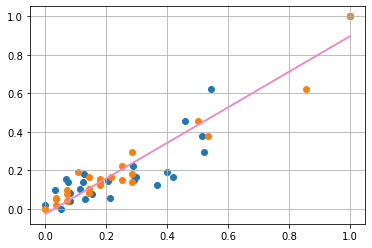

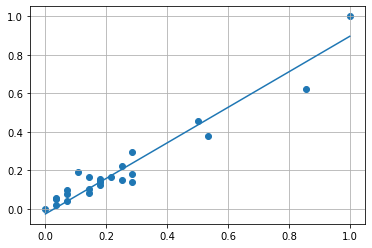

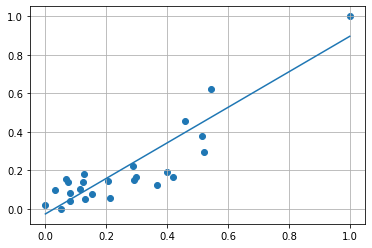

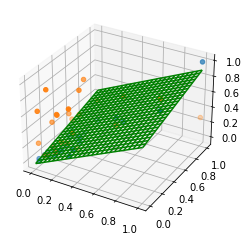

In [10]:
# # Plots

# Actual & Predicted values
plot1 = plt.figure(1)
plt.scatter(dist,actual_y)
plt.scatter(case, actual_y)
plt.plot(xx1,zz2, color = 'orange')
plt.plot(xx0,zz2, color = 'violet')
# plt.plot(x_list, J_tot)
# plt.plot(x_list, J_tot_smooth)
# plt.legend(["Initial Plot", "Predicted Plot", "Predicted Trendline"])
plt.grid()

plot2 = plt.figure(2)
plt.scatter(case, actual_y)
plt.plot(xx0,zz2)
# plt.plot(x_list, J_tot)
# plt.plot(x_list, J_tot_smooth)
# plt.legend(["Initial Plot", "Predicted Plot", "Predicted Trendline"])
plt.grid()


plot3 = plt.figure(3)
plt.scatter(dist, actual_y)
plt.plot(xx1,zz2)
# plt.plot(x_list, J_tot)
# plt.plot(x_list, J_tot_smooth)
# plt.legend(["Initial Plot", "Predicted Plot", "Predicted Trendline"])
plt.grid()

# Scatter plot
# plot3 = plt.figure(3)
# plt.scatter(actual_x, actual_y)
# # plt.plot(actual_x, y_hat)
# # plt.plot(actual_x, J_tot_smooth[0:228], color="Red")
# plt.grid()

# # Error plot
# plot4 = plt.figure(4)
# plt.plot(error)
# plt.grid()

# 3D plot
plot5 = plt.figure(5)
# ax = plot5.add_subplot(111, projection = '3d')
ax = plt.axes(projection = '3d')
ax.scatter(actual_x0, actual_x1, actual_y)
ax.scatter(actual_x0, actual_x1, zz2, 'r+')
ax.plot_wireframe(X, Y, zz_mesh, cmap = 'viridis', edgecolor = 'green')
# ax.plot_surface(X, Y, zz, cmap = 'viridis', edgecolor = 'green')
# ax.add_collection3d(X, Y, zz)
# ax.plot(xx0, zz.T)
# ax.plot(xx1, zz.T)
# plt.plot(actual_x1,zz.T)
# plt.plot(xx0, zz.T)
# plt.plot(xx1, zz.T)
# plt.plot(zz)
# plt.xlim(0 ,30)
# plt.plot(actual_x, zz.T)
plt.grid()

# Show Plot
plt.show()